In [13]:
import sys
import xml.etree.ElementTree as ET

!{sys.executable} -m pip install --break-system-packages -r ./requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [14]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from basic_colors import *

from PIL import Image, ImageDraw, ImageFont

In [7]:
def is_raspberry_pi():
    try:
        with open('/proc/cpuinfo', 'r') as f:
            cpuinfo = f.read()
        return 'Raspberry Pi' in cpuinfo or 'BCM' in cpuinfo
    except FileNotFoundError:
        return False

DEBUG = False
RPI=is_raspberry_pi()
ASSETS = "assets"
FONTS = "fonts"
FONT = 'Font.ttf'

LCD_WIDTH   = 128 #LCD width
LCD_HEIGHT  = 64  #LCD height

import SH1106_mock as SH1106
from INA219_mock import *
   
ina219 = INA219(addr=0x43)

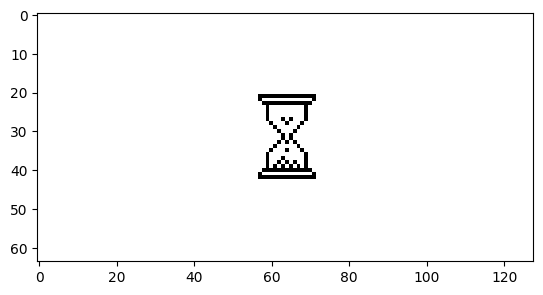

In [ ]:
img_path = os.path.join('documentation', 'images', 'loading.png')
img = Image.open(img_path)
img = img.resize((LCD_WIDTH, LCD_HEIGHT))  # Změna velikosti na rozměry displeje
img = img.convert('L')  # Převod na stupně šedi
trashold = 50
img = img.point(lambda x: 0 if x < trashold else 255, '1')
img = img.convert('1') # Převod na jednobitový formát (černobílý)

# plot the image on the display
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()